In [103]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import ipywidgets as widgets
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Import data

In [104]:
# Params
news_counts_directory = '../../../SDF-HF/data/proc/news_counts'

## Trading 

In [105]:
trading_results_df = pd.read_parquet('../../Results/trading_results/results.parquet')
trading_returns_df = pd.read_parquet('../../Results/trading_results/returns.parquet')
trading_weights_df = pd.read_parquet('../../Results/trading_results/weights.parquet')
model_pred_df = pd.read_parquet('../../Results/trading_results/retpred.parquet')

# Analysis

In [106]:
# Define strategies and models
strategies_list = [
    "Market",
    "Sign",
    "Positive",
    "Standard_error",
    "Tanh",
    "MS Strategy 0.9",
    "MS Strategy 0.5",
]
model_name_list = [
    "Benchmark",
    # "LR",
    "LR_PCA_select",
    "LR_Lasso_select",
    "Lasso",
    "Lasso_PCA_select",
]

## Average Returns

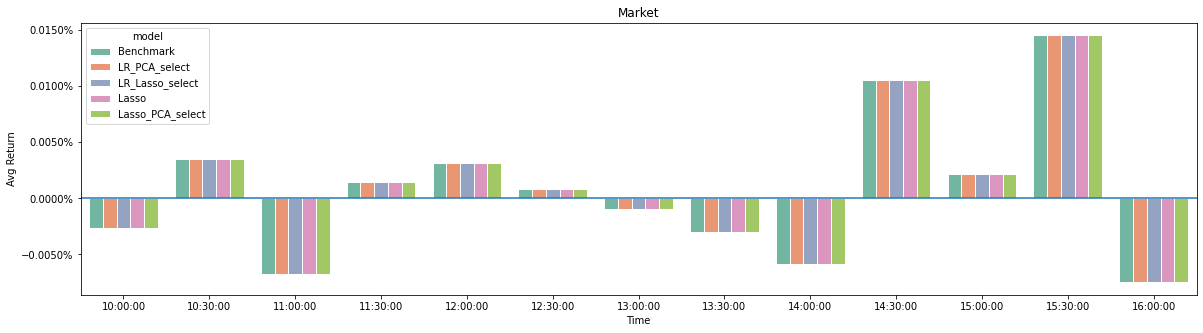

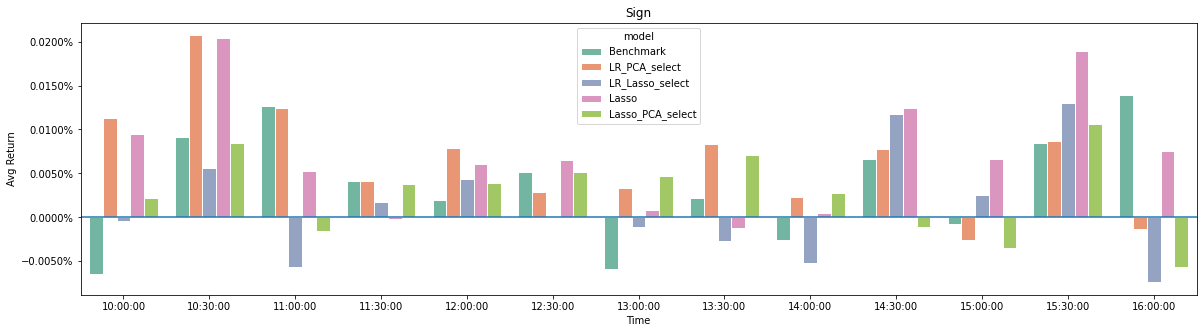

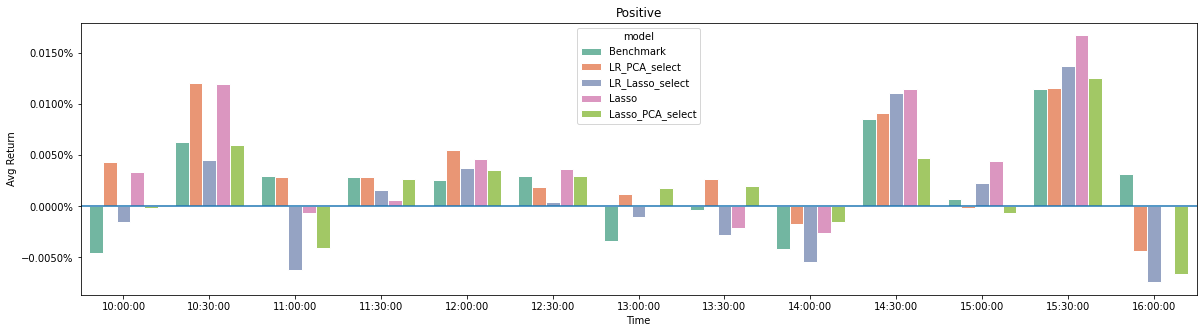

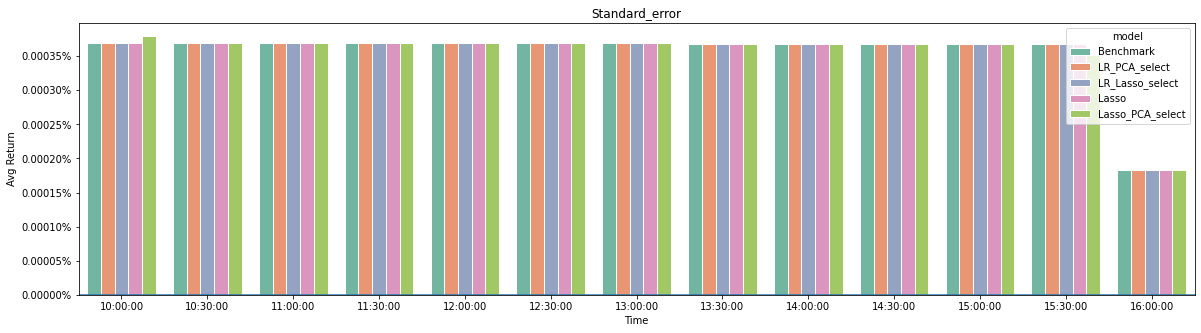

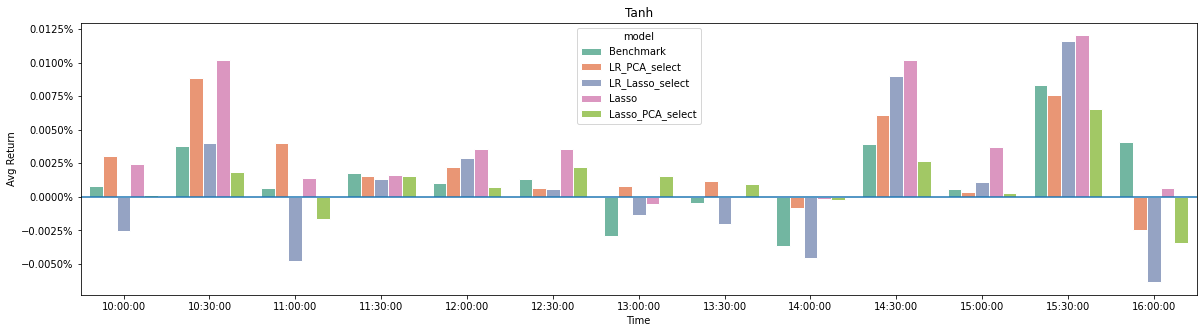

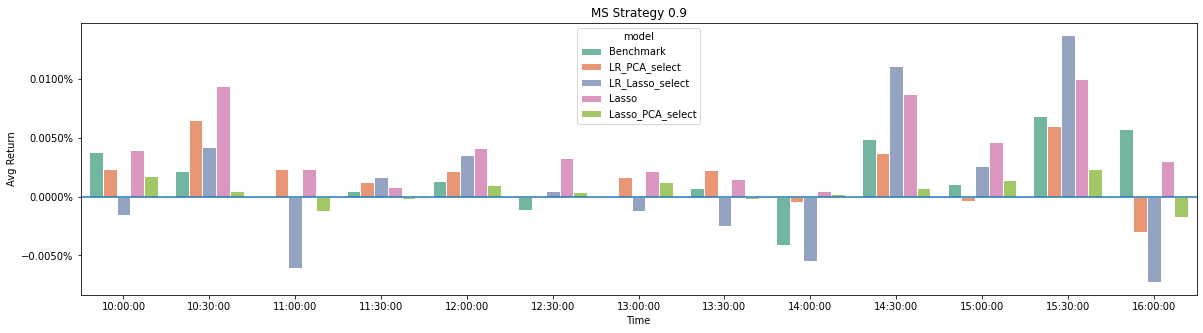

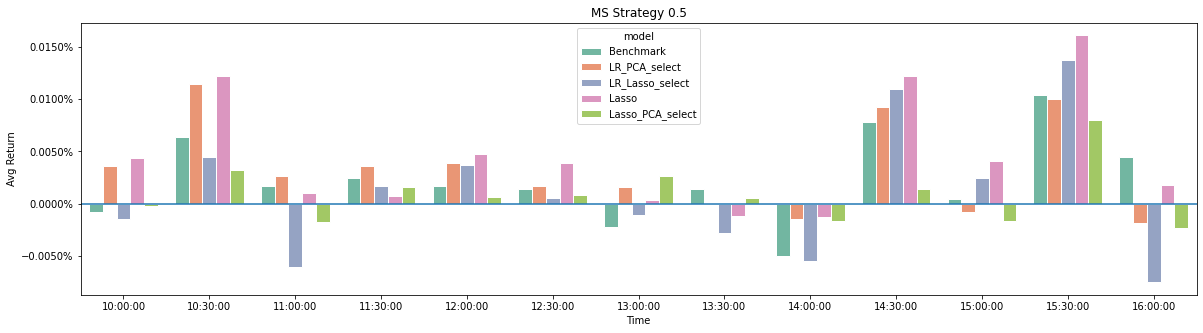

In [107]:
# Plot patterns for each strategy
for strategy in strategies_list:

    # Get returns for this strategy
    strategy_trading_returns_df = trading_returns_df.swaplevel(0, 1, axis=1)[strategy][model_name_list]

    # Aggregate to 30-min
    strategy_trading_returns_agg_df = strategy_trading_returns_df.groupby(
        pd.Grouper(freq="30min")
    ).sum()
    strategy_trading_returns_agg_df = strategy_trading_returns_agg_df.loc[
        set(strategy_trading_returns_df.index).intersection(strategy_trading_returns_agg_df.index)
    ]

    # Get returns by time
    strategy_trading_returns_agg_df["time"] = strategy_trading_returns_agg_df.index.time

    # Melt down for plotting
    strategy_trading_returns_agg_melt_df = (
        strategy_trading_returns_agg_df.groupby(["time"])
        .mean()
        .melt(ignore_index=False, var_name="model", value_name="average_return")
    )

    fig, ax = plt.subplots(figsize=(20, 5))
    sns.barplot(
        x="time",
        y="average_return",
        hue="model",
        palette="Set2",
        edgecolor="w",
        data=strategy_trading_returns_agg_melt_df.reset_index(),
    )
    plt.title(strategy)
    plt.xlabel('Time')
    plt.ylabel('Avg Return')
    ax.axhline(0)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.show()

## Average Vol

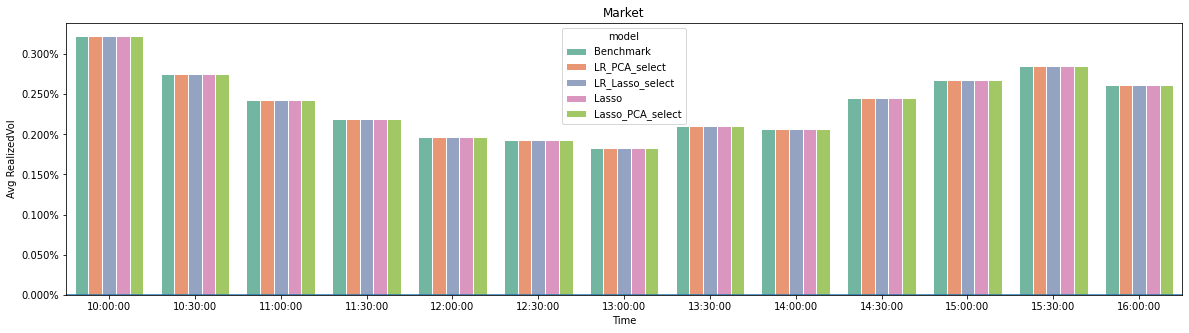

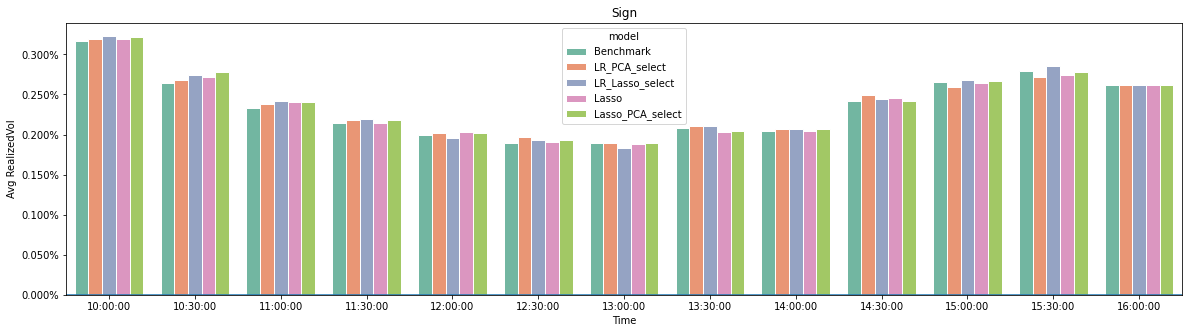

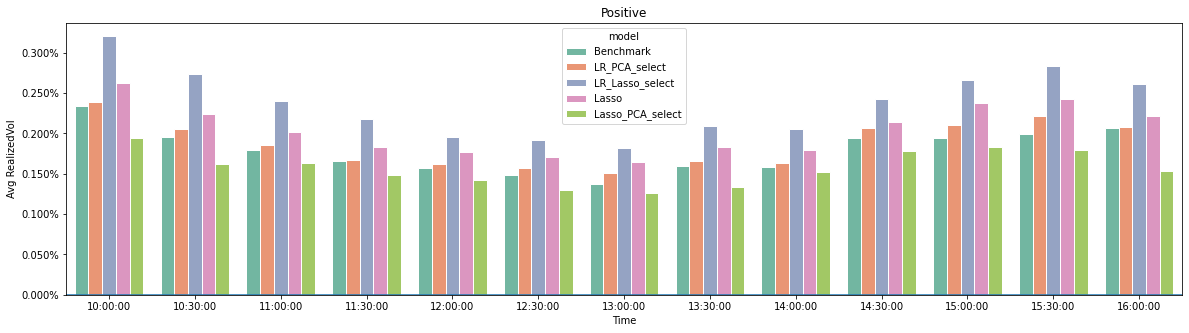

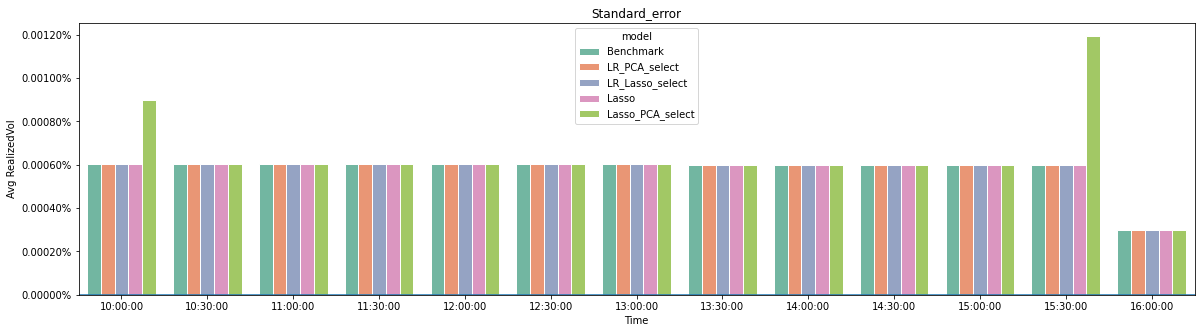

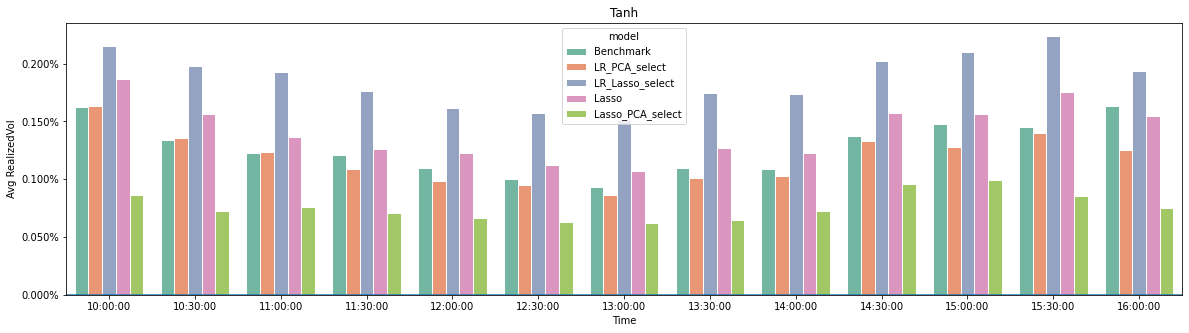

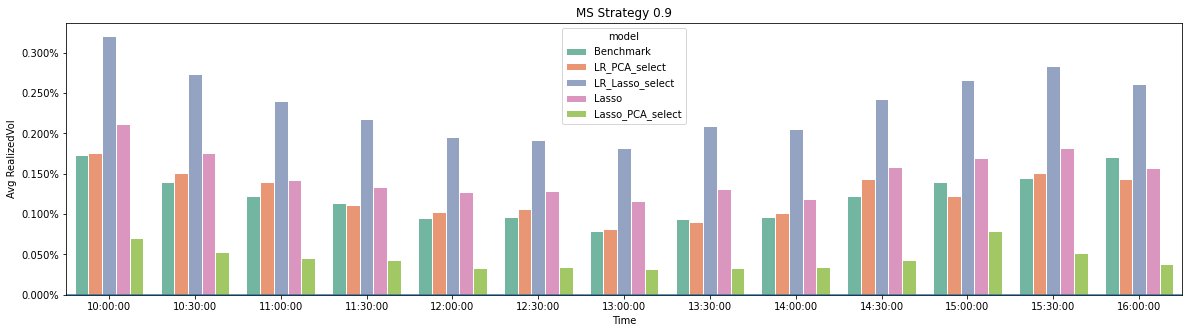

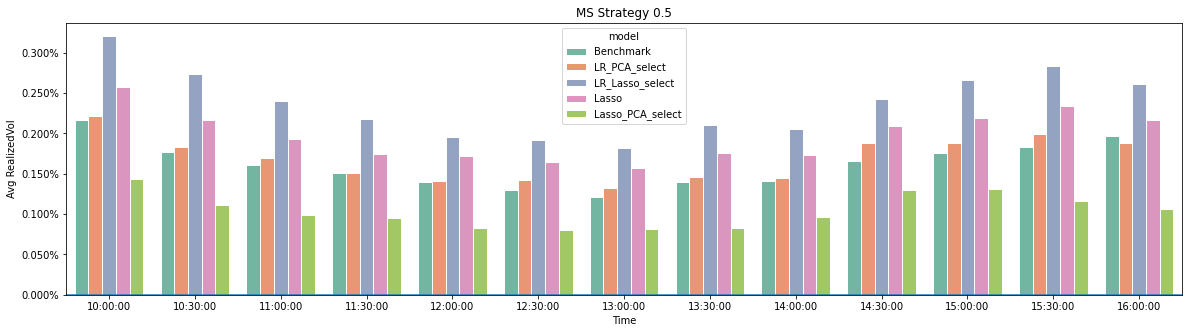

In [108]:
# Plot patterns for each strategy
for strategy in strategies_list:
    
    # Get returns for this strategy
    strategy_trading_returns_df = trading_returns_df.swaplevel(0, 1, axis=1)[strategy][model_name_list]

    # Aggregate to 30-min
    strategy_trading_returns_agg_df = strategy_trading_returns_df.groupby(
        pd.Grouper(freq="30min")
    ).sum()
    strategy_trading_returns_agg_df = strategy_trading_returns_agg_df.loc[
        set(strategy_trading_returns_df.index).intersection(strategy_trading_returns_agg_df.index)
    ]

    # Get returns squared by time
    strategy_trading_returns_agg_df = strategy_trading_returns_agg_df.pipe(np.square)
    strategy_trading_returns_agg_df["time"] = strategy_trading_returns_agg_df.index.time

    # Melt down for plotting
    strategy_trading_returns_agg_melt_df = (
        strategy_trading_returns_agg_df.groupby(["time"])
        .mean()
        .pipe(np.sqrt)
        .melt(ignore_index=False, var_name="model", value_name="average_rvol")
    )

    fig, ax = plt.subplots(figsize=(20, 5))
    sns.barplot(
        x="time",
        y="average_rvol",
        hue="model",
        palette="Set2",
        edgecolor="w",
        data=strategy_trading_returns_agg_melt_df.reset_index(),
    )
    plt.title(strategy)
    plt.xlabel('Time')
    plt.ylabel('Avg RealizedVol')
    ax.axhline(0)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.show()

## Predicted Returns

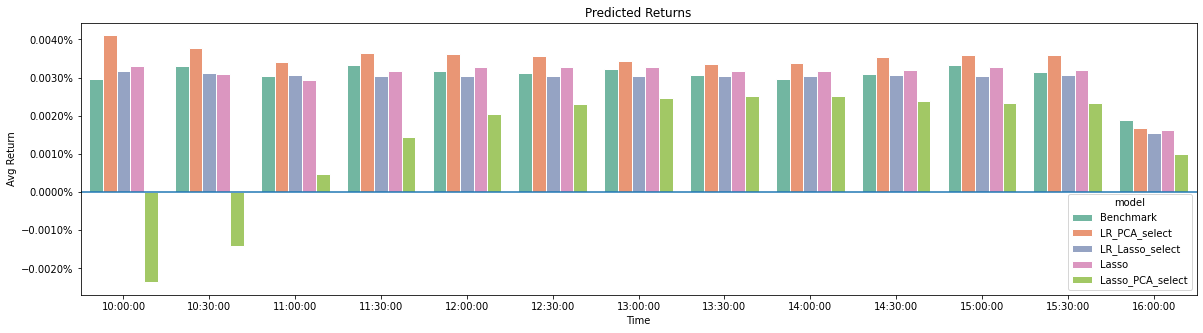

In [109]:
# Get returns for this strategy
strategy_trading_returns_df = model_pred_df[model_name_list]

# Aggregate to 30-min
strategy_trading_returns_agg_df = strategy_trading_returns_df.groupby(
    pd.Grouper(freq="30min")
).sum()
strategy_trading_returns_agg_df = strategy_trading_returns_agg_df.loc[
    set(strategy_trading_returns_df.index).intersection(strategy_trading_returns_agg_df.index)
]

# Get returns by time
strategy_trading_returns_agg_df["time"] = strategy_trading_returns_agg_df.index.time

# Melt down for plotting
strategy_trading_returns_agg_melt_df = (
    strategy_trading_returns_agg_df.groupby(["time"])
    .mean()
    .melt(ignore_index=False, var_name="model", value_name="average_return")
)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    x="time",
    y="average_return",
    hue="model",
    palette="Set2",
    edgecolor="w",
    data=strategy_trading_returns_agg_melt_df.reset_index(),
)
plt.title('Predicted Returns')
plt.xlabel('Time')
plt.ylabel('Avg Return')
ax.axhline(0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()